In [70]:
import numpy as np
import scipy as sc
import sympy as sp
import matplotlib.pyplot as plt

In [138]:
comparisons = []
with open('comp_inputs.txt', 'r') as f:
    for line in f:
        a, b = line.strip().split(';')
        a = float(a)
        b = float(b)
        comparisons.append((a, b))
        
comp_lhs = list(map(lambda x:x[0], comparisons))
comp_rhs = list(map(lambda x:x[1], comparisons))

In [140]:
print(np.max(comp_lhs))
print(np.min(comp_lhs))
print(np.max(comp_rhs))
print(np.min(comp_rhs))

1253.38
0.00202482
1253.38
0.0


In [50]:
def iter_inv_sqrt(d):
    x = d*0.5
    for i in range(10):
        x = x + 0.5*(x*(1-x*x*d))
        #print(x)
    return x

In [51]:
iter_inv_sqrt(2)

0.7071067811865476

In [52]:
t = np.linspace(-5, 5)
res = []
for x in t:
    sq = iter_inv_sqrt(x)
    if abs(sq - 1/np.sqrt(x)) < 1e-5:
        res.append(True)
    else:
        res.append(False)

/tmp/ipykernel_6717/2865463703.py:4: RuntimeWarning: overflow encountered in scalar multiply
  x = x + 0.5*(x*(1-x*x*d))
/tmp/ipykernel_6717/463640661.py:5: RuntimeWarning: invalid value encountered in sqrt
  if abs(sq - 1/np.sqrt(x)) < 1e-5:
/tmp/ipykernel_6717/2865463703.py:4: RuntimeWarning: invalid value encountered in scalar add
  x = x + 0.5*(x*(1-x*x*d))


In [53]:
print(res)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [68]:
def poly_sign(x):
    res = 0
    for i in range(100):
        res += 1.0/(4**i) * sc.special.binom(2*i, i) * x*(1-x*x)**i
    return res

vpoly = np.vectorize(poly_sign)

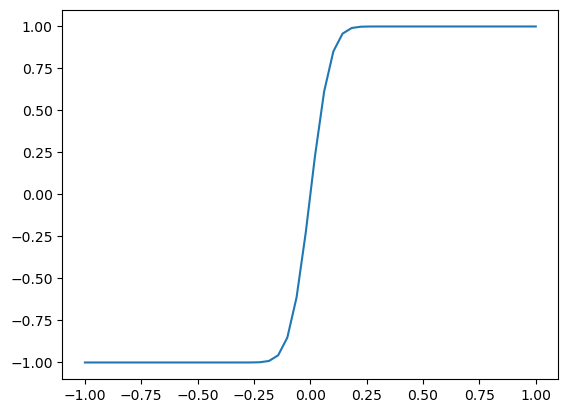

In [69]:
k = np.linspace(-1,1)

plt.plot(k, vpoly(k))

In [192]:
x = sp.var('x')
taylor = sp.series(1/sp.sqrt(x), x, x0=8, n=10).removeO()
taylor

-12155*sqrt(2)*(x - 8)**9/35184372088832 + 6435*sqrt(2)*(x - 8)**8/2199023255552 - 429*sqrt(2)*(x - 8)**7/17179869184 + 231*sqrt(2)*(x - 8)**6/1073741824 - 63*sqrt(2)*(x - 8)**5/33554432 + 35*sqrt(2)*(x - 8)**4/2097152 - 5*sqrt(2)*(x - 8)**3/32768 + 3*sqrt(2)*(x - 8)**2/2048 - sqrt(2)*(x - 8)/64 + sqrt(2)/4

In [193]:
taylor.subs({'x':1.6}).evalf()

0.761393574951396

In [197]:
x = np.linspace(0,8)
invsq = np.zeros(len(x))
taylorsq = np.zeros(len(x))

for i, x_ in enumerate(x):
    invsq[i] = 1/np.sqrt(x_)
    taylorsq[i] = float(taylor.subs({'x': x_}).evalf())

/tmp/ipykernel_6717/989757183.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  invsq[i] = 1/np.sqrt(x_)


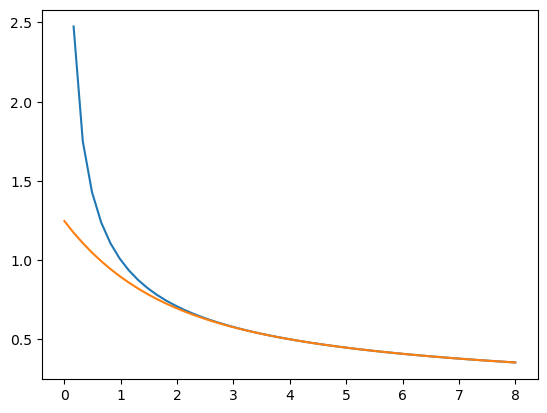

In [198]:
plt.plot(x, invsq)
plt.plot(x, taylorsq)

In [219]:
def taylor_iter_inv_sqrt(d):
    x = float(taylor.subs({'x':d}).evalf())
    for i in range(24):
        x = x + 0.5*(x*(1-x*x*d))
        #print(x)
    return x

In [220]:
taylor_iter_inv_sqrt(0.0002/125.338)

791.6375433239633

In [221]:
def silly_inv_abs(x):
    return taylor_iter_inv_sqrt(x*x)

def silly_sign(x):
    return x*silly_inv_abs(x)

def silly_max(a,b):
    sgn = silly_sign(a-b)
    return 0.5*(1+sgn)*a+0.5*(1-sgn)*b

In [ ]:
my_comp_res = []
correct_comp_res = []

for a,b in comparisons:
    cres = silly_max(a/125,b/125)*125
    
    dev = abs(max(a,b)-cres)
    
    if dev>1e-8:
        print(f'max({a}, {b}) = {max(a,b)}, approx = {cres}, dev = {dev}')
     

max(0.0024825, 0.0) = 0.0024825, approx = 0.0017353416528769984, dev = 0.0007471583471230015
max(24.5507, 24.5556) = 24.5556, approx = 24.554854291271734, dev = 0.0007457087282638497
max(0.0208956, 0.0024825) = 0.0208956, approx = 0.020893849584197197, dev = 1.750415802803662e-06
